# Part 1: Data Cleaning and Feature Engineering for the Bike Sharing Dataset

## Data Exploration:

### loading the data:

In [1]:
import pandas as pd

df = pd.read_csv('diabetes+dataset.csv')
print(df.head(2))

                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...                  60   

   Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
0                         No                   No         Positive   
1                        Yes                   No         Negative   

  Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
0                        3               Normal                      56   
1                        1       

In [2]:
print(df.shape)

(70000, 34)


from the shape attribute we discover that the dataset have 34 columns (features), and 15329 row (data points).

In [3]:
print(df.columns)
print(df.index)

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')
RangeIndex(start=0, stop=70000, step=1)


### Data Visualization:

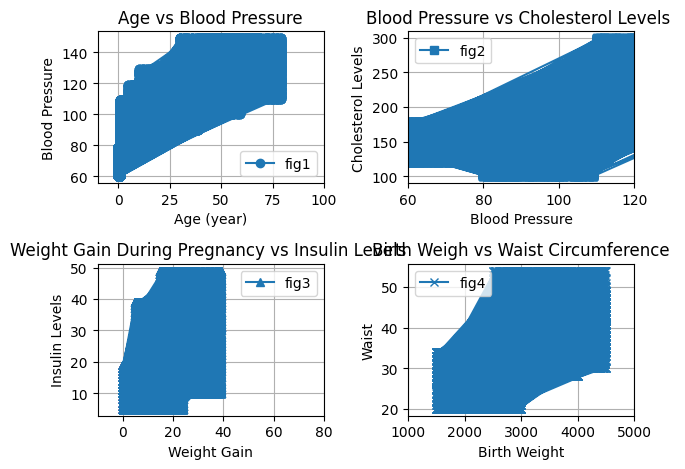

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2)

axs[0,0].plot(df['Age'], df['Blood Pressure'], label='fig1', marker='o')
axs[0,0].set_xlim(-10, 100)
axs[0,0].set_xlabel('Age (year)')
axs[0,0].set_ylabel('Blood Pressure')
axs[0,0].grid(True)
axs[0,0].legend()
axs[0,0].set_title('Age vs Blood Pressure')

axs[0,1].plot(df['Blood Pressure'], df['Cholesterol Levels'], label='fig2', marker='s')
axs[0,1].set_xlim(60, 120)
axs[0,1].set_xlabel('Blood Pressure')
axs[0,1].set_ylabel('Cholesterol Levels')
axs[0,1].grid(True)
axs[0,1].legend()
axs[0,1].set_title('Blood Pressure vs Cholesterol Levels ')

axs[1,0].plot(df['Weight Gain During Pregnancy'], df['Insulin Levels'], label='fig3', marker='^')
axs[1,0].set_xlim(-10, 80)
axs[1,0].set_xlabel('Weight Gain')
axs[1,0].set_ylabel('Insulin Levels')
axs[1,0].grid(True)
axs[1,0].legend()
axs[1,0].set_title('Weight Gain During Pregnancy vs Insulin Levels ')

axs[1,1].plot(df['Birth Weight'], df['Waist Circumference'], label='fig4', marker='x')
axs[1,1].set_xlim(1000, 5000)
axs[1,1].set_xlabel('Birth Weight')
axs[1,1].set_ylabel('Waist')
axs[1,1].grid(True)
axs[1,1].legend()
axs[1,1].set_title('Birth Weigh vs Waist Circumference')

fig.tight_layout()
plt.show()

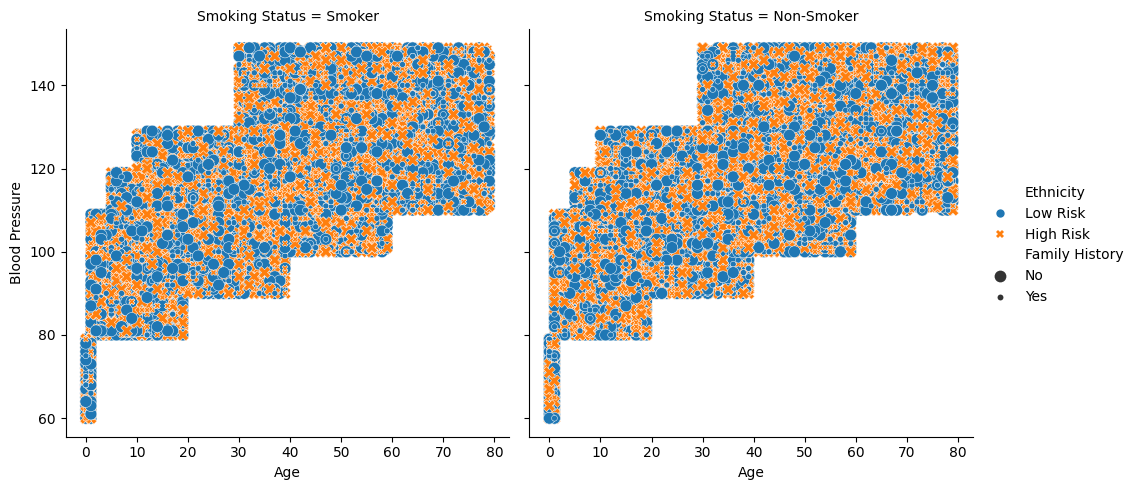

In [5]:
import seaborn as sns
import pandas as pd

sns.relplot(data=df,
    x="Age", y="Blood Pressure", col="Smoking Status",
    hue="Ethnicity", style="Ethnicity", size="Family History",
)

<Axes: xlabel='Blood Glucose Levels', ylabel='Count'>

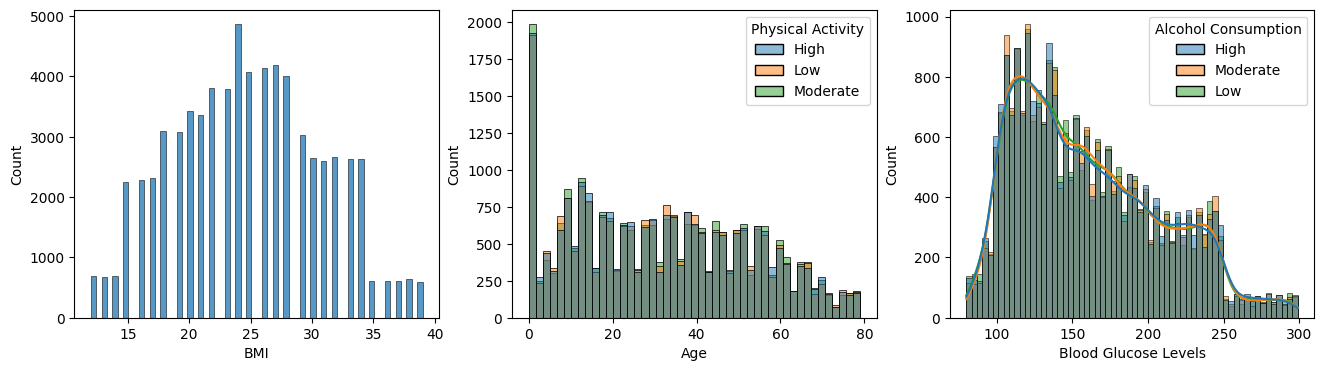

In [6]:
fig, axs = plt.subplots(figsize=(16, 4),ncols=3)

#Create histograms displaying the distribution of tip values
sns.histplot(data=df, x="BMI", ax=axs[0])

#Create histograms displaying the distribution of tip values based on the time of day
sns.histplot(data=df, x="Age", hue="Physical Activity",ax=axs[1])

#Create histograms displaying the distribution of tip values based on the time of day, and incorporate the actual distribution curve.
sns.histplot(data=df, x="Blood Glucose Levels", hue="Alcohol Consumption",ax=axs[2], kde=True)

<Axes: title={'center': 'BMI'}, xlabel='History of PCOS'>

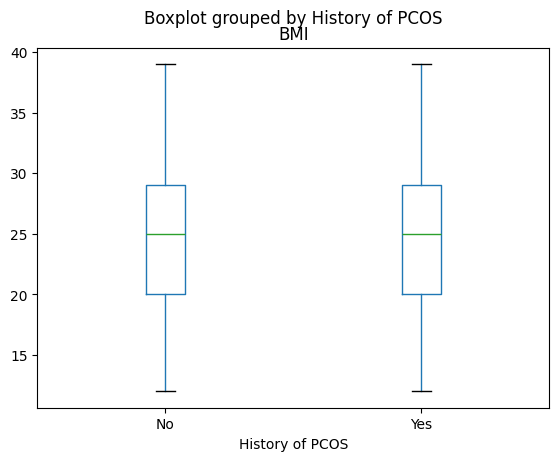

In [7]:
df.boxplot(by ='History of PCOS', column =['BMI'], grid = False)

<Axes: title={'center': 'Age'}, xlabel='Physical Activity'>

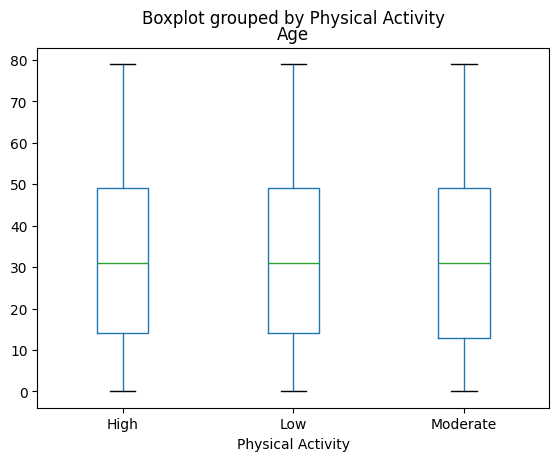

In [8]:
df.boxplot(by ='Physical Activity', column =['Age'], grid = False)

### Descriptive Statistics:

In [9]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 74 (delta 18), reused 62 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 23.51 MiB | 14.15 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [10]:
# Calculate the mean for each column in the DataFrame
Mean = df[['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']].mean()
print(f"Mean values: {Mean.values}\n")

# Calculate the median for each column in the DataFrame
Median = df[['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']].median()
print(f"Median values: {Median.values}\n")

# Calculate the mode for each column in the DataFrame
Mode = df[['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']].mode().values
print(f"Mode values: {Mode}\n")

Mean values: [2.16074429e+01 3.20207000e+01 2.47829429e+01 1.11339543e+02
 1.94867200e+02 3.50516571e+01 1.60701657e+02 1.54964143e+01
 4.75642429e+01 7.02646714e+01 1.80415714e+00 4.64205286e+01
 3.09706107e+03]

Median values: [1.900e+01 3.100e+01 2.500e+01 1.130e+02 1.910e+02 3.400e+01 1.520e+02
 1.600e+01 4.600e+01 7.200e+01 2.000e+00 4.800e+01 3.103e+03]

Mode values: [[1.300e+01 1.000e+00 2.400e+01 1.110e+02 1.940e+02 3.400e+01 1.220e+02
  1.900e+01 3.700e+01 7.600e+01 2.000e+00 5.300e+01 2.522e+03]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan 2.617e+03]]



<ipython-input-11-b9feaa9823ba>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0,0].set_title(f"Mean = {Mean[0]}\n Median = {Median[0]} \n Mode = {Mode[0,0]}")
<ipython-input-11-b9feaa9823ba>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0,1].set_title(f"Mean = {Mean[1]}\n Median = {Median[1]} \n Mode = {Mode[0,1]}")
<ipython-input-11-b9feaa9823ba>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0,2].set_title(f"

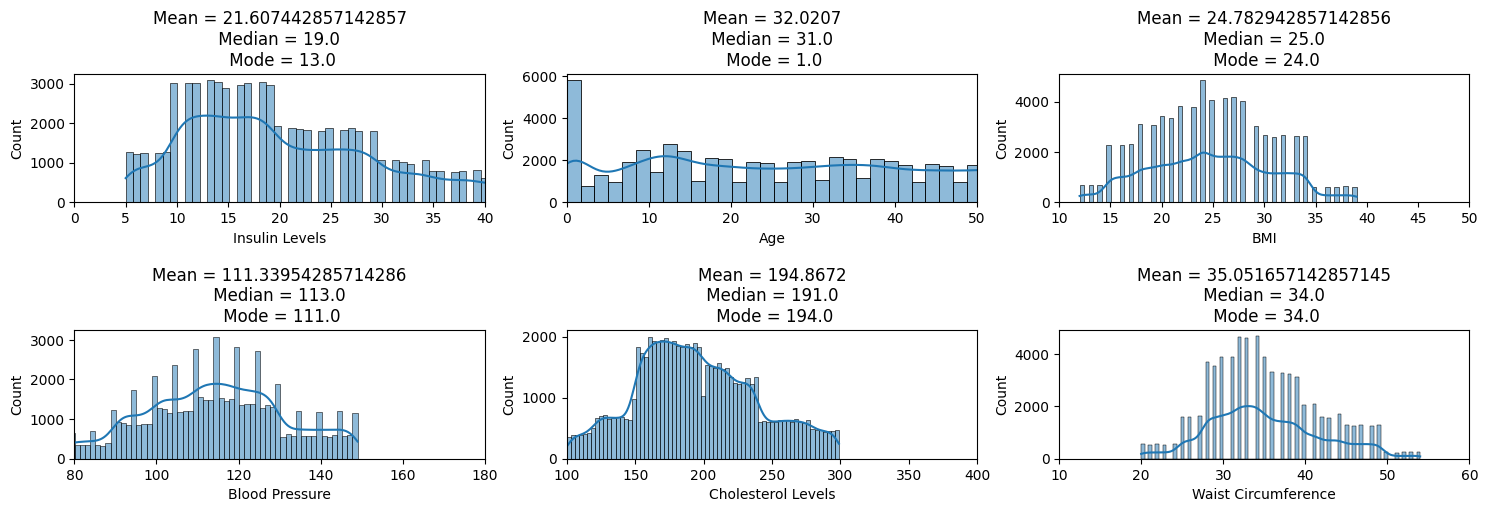

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=3,nrows=2)

#Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x='Insulin Levels', ax=axs[0,0], kde=True);axs[0,0].set(xlim=(0,40))
axs[0,0].set_title(f"Mean = {Mean[0]}\n Median = {Median[0]} \n Mode = {Mode[0,0]}")

sns.histplot(data=df, x='Age', ax=axs[0,1], kde=True);axs[0,1].set(xlim=(0, 50))
axs[0,1].set_title(f"Mean = {Mean[1]}\n Median = {Median[1]} \n Mode = {Mode[0,1]}")

sns.histplot(data=df, x='BMI', ax=axs[0,2], kde=True);axs[0,2].set(xlim=(10, 50))
axs[0,2].set_title(f"Mean = {Mean[2]}\n Median = {Median[2]} \n Mode = {Mode[0,2]}")

sns.histplot(data=df, x='Blood Pressure', ax=axs[1,0], kde=True);axs[1,0].set(xlim=(80, 180))
axs[1,0].set_title(f"Mean = {Mean[3]}\n Median = {Median[3]} \n Mode = {Mode[0,3]}")

sns.histplot(data=df, x='Cholesterol Levels', ax=axs[1,1], kde=True);axs[1,1].set(xlim=(100, 400))
axs[1,1].set_title(f"Mean = {Mean[4]}\n Median = {Median[4]} \n Mode = {Mode[0,4]}")

sns.histplot(data=df, x='Waist Circumference', ax=axs[1,2], kde=True);axs[1,2].set(xlim=(10, 60))
axs[1,2].set_title(f"Mean = {Mean[5]}\n Median = {Median[5]} \n Mode = {Mode[0,5]}")

fig.subplots_adjust(hspace=1)

In [12]:
# Calculate the variance for each column in the DataFrame
Variance = df[['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']].var()
print(f"Variance values: {Variance.values}\n")

# Calculate the standard deviaton for each column in the DataFrame
STD = df[['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']].std()
print(f"Standard deviation values: {STD.values}\n")

Variance values: [1.16334604e+02 4.42815140e+02 3.61710315e+01 3.97803022e+02
 1.98314055e+03 4.62870785e+01 2.31991996e+03 9.27965414e+01
 3.99387550e+02 1.43175580e+02 4.62609327e-01 3.76014342e+02
 5.09563691e+05]

Standard deviation values: [1.07858520e+01 2.10431732e+01 6.01423574e+00 1.99449999e+01
 4.45324663e+01 6.80346077e+00 4.81655475e+01 9.63309615e+00
 1.99846829e+01 1.19655999e+01 6.80153899e-01 1.93910892e+01
 7.13837300e+02]



In [13]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['Age'].quantile(0.25)
percentile_75 = df['Age'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

25th Percentile: 14.0
75th Percentile: 49.0
Interquartile Range (IQR): 35.0


now wthat we understand the data set better, let's try and address the issues that it could face:

## Data Cleaning:
### 1. missing values:

In [14]:
df.isnull().sum()

,0
Target,0
Genetic Markers,0
Autoantibodies,0
Family History,0
Environmental Factors,0
Insulin Levels,0
Age,0
BMI,0
Physical Activity,0
Dietary Habits,0


the dataset does not contain any rows with missing data. so missing data may not ba a problem it suffer from

In [15]:
for feature in df.columns:
  unique_values = df[feature].unique()
  print(f"Unique values in the {feature} feature:", unique_values)
  print("********************************************************")

Unique values in the Target feature: ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY']
********************************************************
Unique values in the Genetic Markers feature: ['Positive' 'Negative']
********************************************************
Unique values in the Autoantibodies feature: ['Negative' 'Positive']
********************************************************
Unique values in the Family History feature: ['No' 'Yes']
********************************************************
Unique values in the Environmental Factors feature: ['Present' 'Absent']
********************************************************
Unique values in the Insulin Levels feature: [40 13 27  8 17 29 10 47 21 16 22  9 38 14 12 30 19 4

non of the features had a 'null', 'NAN' or any other value indecating that it's a place holder for a missing value. So the data set doesn't suffer from missing data.

### 2. outliers:

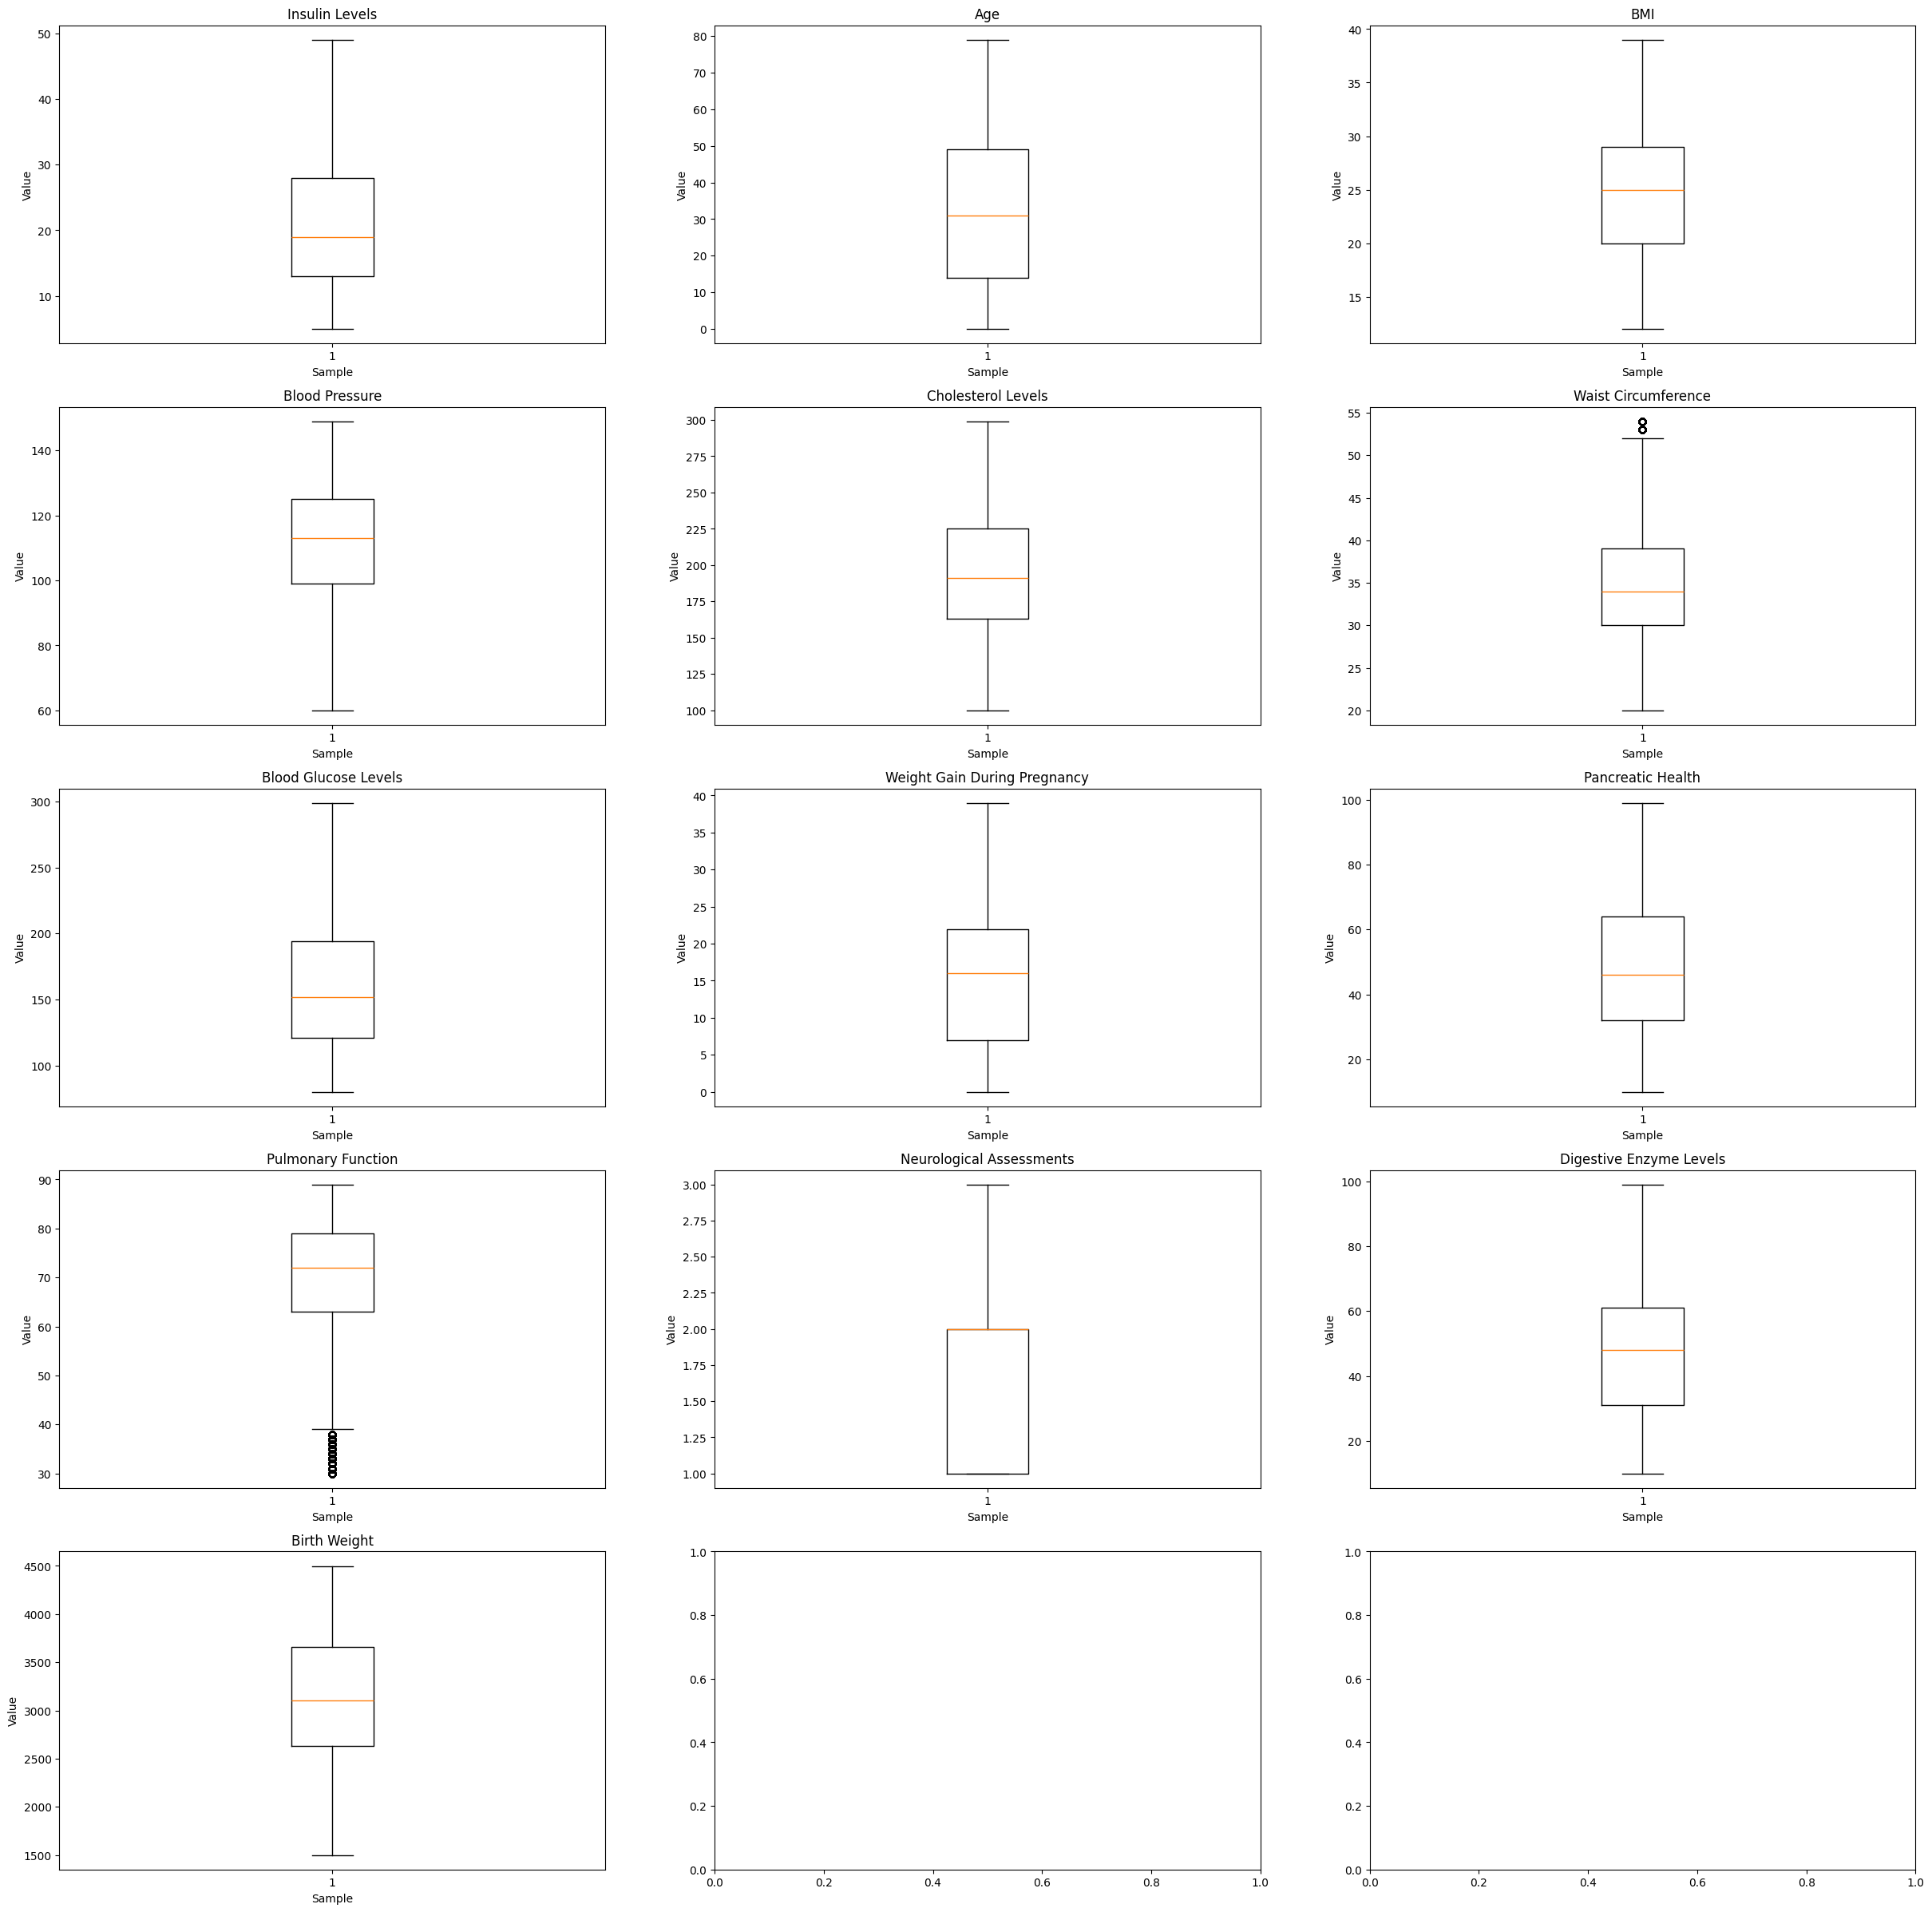

In [16]:
from enum import auto
numeric_features = ['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']

fig, axs = plt.subplots(5, 3, figsize=(30,30))
i=0
j=0

for feature in numeric_features:
  # Plots Boxplot for Data 1
  axs[i,j].boxplot(df[feature])
  axs[i,j].set_title(feature)
  axs[i,j].set_xlabel('Sample')
  axs[i,j].set_ylabel('Value')

  j+=1

  if(j >= 3):
    j = 0
    i+=1

  if(i >= 5): break


features that the box plot detected outliers in are: Waist Circumference and Pulmonary Function.



 *   Waist Circumference

In [17]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['Waist Circumference'].quantile(0.25)
percentile_50 = df['Waist Circumference'].quantile(0.5)
percentile_75 = df['Waist Circumference'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_Height = percentile_25 - 1.5*iqr
UpperBound_Height = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_Height}, and Upper Bound = {UpperBound_Height}")

25th Percentile: 30.0
50th Percentile: 34.0
75th Percentile: 39.0
Interquartile Range (IQR): 9.0
Lower Bound = 16.5, and Upper Bound = 52.5


In [18]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['Waist Circumference'] < LowerBound_Height) | (df['Waist Circumference'] > UpperBound_Height)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 522 (0.7457142857142857%)


it's less than 0.8%,so we can drop/delete those outliers.

In [19]:
df= df[(df['Waist Circumference'] >= LowerBound_Height) & (df['Waist Circumference'] <= UpperBound_Height)]

NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['Waist Circumference'] < LowerBound_Height) | (df['Waist Circumference'] > UpperBound_Height)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)



*   Pulmonary Function

In [20]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['Pulmonary Function'].quantile(0.25)
percentile_50 = df['Pulmonary Function'].quantile(0.5)
percentile_75 = df['Pulmonary Function'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_Height = percentile_25 - 1.5*iqr
UpperBound_Height = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_Height}, and Upper Bound = {UpperBound_Height}")

25th Percentile: 63.0
50th Percentile: 72.0
75th Percentile: 79.0
Interquartile Range (IQR): 16.0
Lower Bound = 39.0, and Upper Bound = 103.0


In [21]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['Pulmonary Function'] < LowerBound_Height) | (df['Pulmonary Function'] > UpperBound_Height)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 1206 (1.7358012608307665%)


too many to be deleted. however, from the box plot most values of this feature are between 30 and 90, and almost all outliers are the values in the range 30 to 40.

a reasonable plan is to transform the values using a function that'll increase the smaller values, and dampen big values, like the log function.

<Axes: >

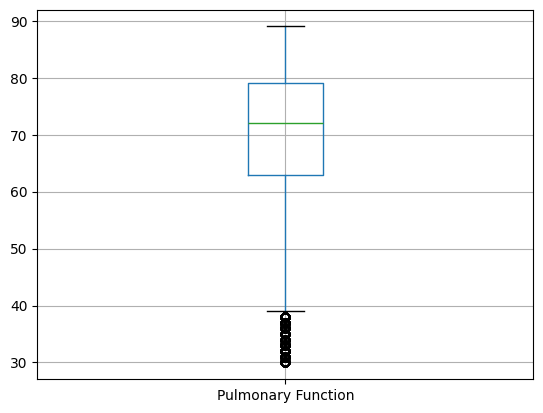

In [22]:
df.boxplot(column=['Pulmonary Function'])

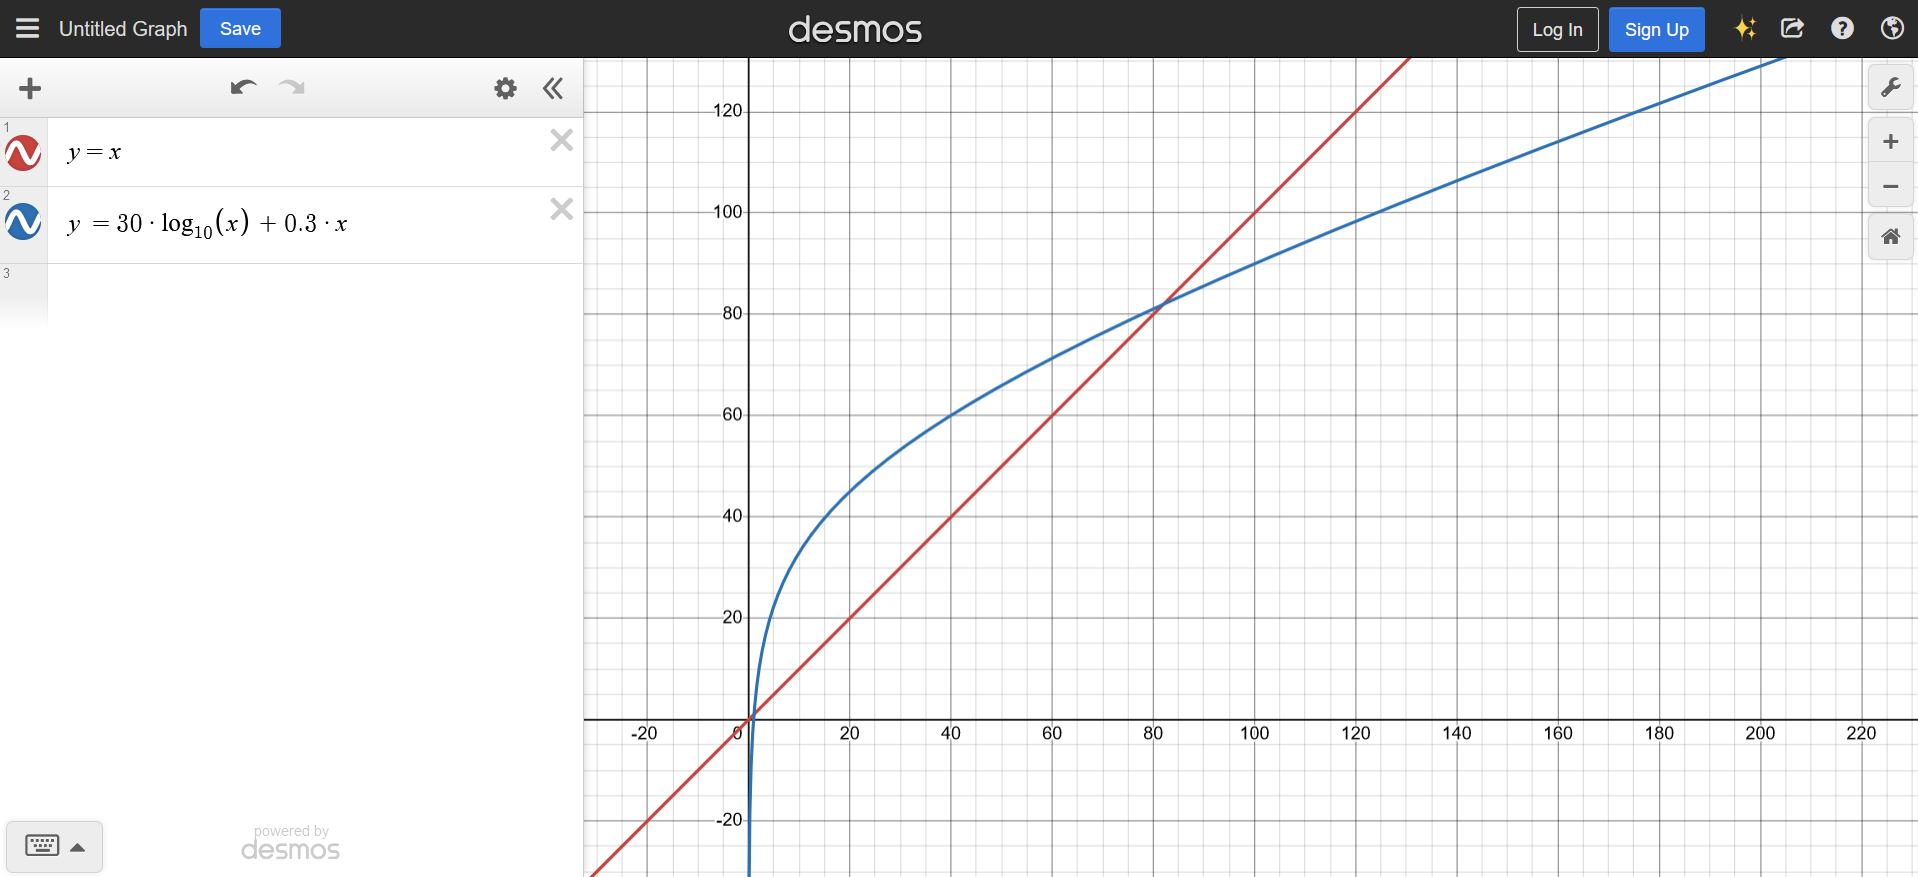

In [23]:
from math import log  # Import the log function from the math module

df['Pulmonary Function'] = df['Pulmonary Function'].apply(lambda x: round((10*log(x) + 0.3*x),2))

In [24]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['Pulmonary Function'].quantile(0.25)
percentile_50 = df['Pulmonary Function'].quantile(0.5)
percentile_75 = df['Pulmonary Function'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)


25th Percentile: 60.33
50th Percentile: 64.37
75th Percentile: 67.39
Interquartile Range (IQR): 7.060000000000002


In [25]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['Pulmonary Function'] < LowerBound_Height) | (df['Pulmonary Function'] > UpperBound_Height)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


# Feature Engineering:

## Analyze the relevance of each feature for the machine learning task:

In [26]:
from sklearn.feature_selection import VarianceThreshold

numeric_features = ['Insulin Levels','Age','BMI','Blood Pressure','Cholesterol Levels',
          'Waist Circumference','Blood Glucose Levels','Weight Gain During Pregnancy',
          'Pancreatic Health','Pulmonary Function','Neurological Assessments',
          'Digestive Enzyme Levels','Birth Weight']

# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
selector = selector.fit(df[numeric_features])

# Apply the selector to the data
df_high_variance = selector.transform(df[numeric_features])

# Variance of the data
selector.variances_

array([4.4000000e+01, 7.9000000e+01, 2.7000000e+01, 8.9000000e+01,
       1.9900000e+02, 3.2000000e+01, 2.1900000e+02, 3.9000000e+01,
       8.9000000e+01, 2.8580000e+01, 4.6053485e-01, 8.9000000e+01,
       2.9990000e+03])

['BMI', 'Cholesterol Levels', 'Blood Glucose Levels', 'Pulmonary Function', 'Neurological Assessments', 'Birth Weight']  are all numeric features with variance less than 3e+1 threshold.

In [27]:
# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=3e+01)

# Fit and apply the selector to the data
df_high_variance = selector.fit_transform(df[numeric_features])
new_df = pd.DataFrame(df_high_variance)

# Display the original and selected data
print("Original Data:")
print(df.columns)
print(df.index)

print("Data after VarianceThreshold:")
print(new_df.columns)
print(new_df.index)

Original Data:
Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997, 69998, 69999],
      d

## scaling:

another thing the data need, is to normalize very big/small numeric values, like the Birth Weight and Neurological Assessments featuers.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(df[['Birth Weight','Neurological Assessments']])
data = scaler.transform(df[['Birth Weight','Neurological Assessments']])
df_scaler = pd.DataFrame(data,columns=['Birth Weight','Neurological Assessments'],index=df.index)
df_scaler.describe()

,Birth Weight,Neurological Assessments
count,69478.000000,69478.000000
mean,53.153369,39.946458
std,23.806719,33.931603
min,0.000000,0.000000
25%,37.545849,0.000000
50%,53.351117,50.000000
75%,71.823941,50.000000
max,100.000000,100.000000


In [29]:
df[['Birth Weight','Neurological Assessments']] = df_scaler[['Birth Weight','Neurological Assessments']]

<Axes: >

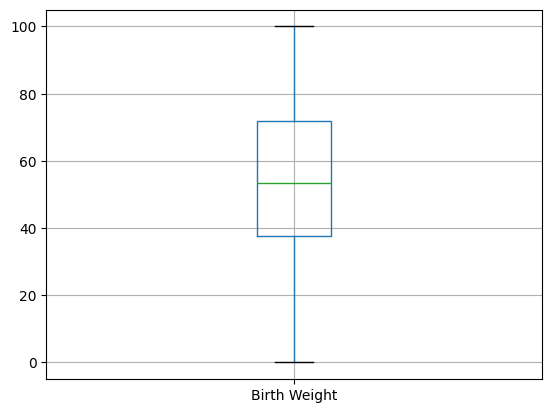

In [30]:
df.boxplot(column=['Birth Weight'])

<Axes: >

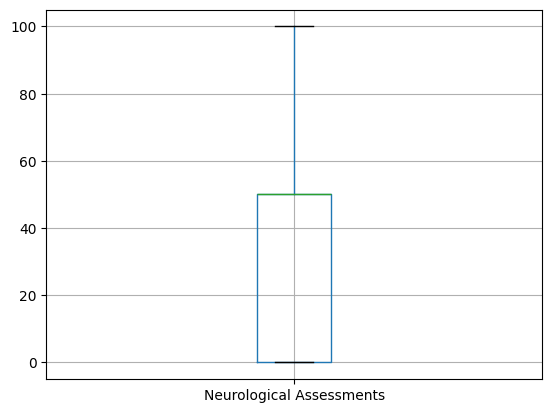

In [31]:
df.boxplot(column=['Neurological Assessments'])

## Encode categorical variables:

In [32]:
for feature in df.columns:
  if df[feature].dtypes == 'object':
    print(f"Unique values in the {feature} feature:", df[feature].unique())
    print("******************************************")

Unique values in the Target feature: ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY']
******************************************
Unique values in the Genetic Markers feature: ['Positive' 'Negative']
******************************************
Unique values in the Autoantibodies feature: ['Negative' 'Positive']
******************************************
Unique values in the Family History feature: ['No' 'Yes']
******************************************
Unique values in the Environmental Factors feature: ['Present' 'Absent']
******************************************
Unique values in the Physical Activity feature: ['High' 'Low' 'Moderate']
******************************************
Unique values in the Dietary Habits feature: ['Heal

let's start with binary catagorical features, and incode them to 1 and 0.

In [33]:
binary_catagorical = ['Genetic Markers','Autoantibodies','Family History','Environmental Factors','Dietary Habits','Ethnicity','Smoking Status','Glucose Tolerance Test',
                      'History of PCOS','Previous Gestational Diabetes','Pregnancy History','Cystic Fibrosis Diagnosis','Steroid Use History','Genetic Testing',
                      'Liver Function Tests','Early Onset Symptoms']

for feature in binary_catagorical:
  unique_values = df[feature].unique()
  if len(unique_values) == 2:  # Ensure it's binary
    # Map the first unique value to 0 and the second to 1
    mapping = {unique_values[0]: 0, unique_values[1]: 1}
    df[feature] = df[feature].map(mapping)

now let's encode ordered catagorical features: Physical Activity, Socioeconomic Factors, Alcohol Consumption

In [34]:
mapping = {'Low': 0, 'Moderate': 1,'High':3}
df['Physical Activity'] = df['Physical Activity'].map(mapping)
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(mapping)

In [35]:
mapping = {'Low': 0, 'Medium': 1,'High':3}
df['Socioeconomic Factors'] = df['Socioeconomic Factors'].map(mapping)

Urine Test could be encoded with one-hot-encoding as it doesn't contain many catagories, and it point to either existance or non existace of something.

In [36]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder() #(handle_unknown='ignore')

enc.fit(df[['Urine Test']])

df_gender = enc.transform(df[['Urine Test']]).toarray()

df_ohenc = df.copy()

df_ohenc[enc.categories_[0]] = df_gender

df_ohenc.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms,Glucose Present,Ketones Present,Normal,Protein Present
0,Steroid-Induced Diabetes,0,0,0,0,40,44,38,3,0,...,100.0,0,56,Ketones Present,37.645882,0,0.0,1.0,0.0,0.0
1,Neonatal Diabetes Mellitus (NDM),0,0,0,0,13,1,17,3,0,...,0.0,0,28,Glucose Present,12.704235,1,1.0,0.0,0.0,0.0
2,Prediabetic,0,1,1,0,27,36,24,3,1,...,0.0,1,55,Ketones Present,70.756919,1,0.0,1.0,0.0,0.0
3,Type 1 Diabetes,1,1,0,0,8,7,16,0,1,...,50.0,1,60,Ketones Present,68.089363,0,0.0,1.0,0.0,0.0
4,Wolfram Syndrome,1,0,1,0,17,10,17,3,0,...,0.0,0,24,Protein Present,9.003001,0,0.0,0.0,0.0,1.0


In [37]:
df_ohenc = df_ohenc.drop(["Urine Test"], axis = 1)
df_ohenc.shape

(69478, 37)

only remaining catagorical feature is the target. it got too many catagories to use one-hot-encoder, and although the labels in it is not ordered a numeric replacement will work, as it's the target class the model need to predict. so if I encoded it to numeric values from 0 to 9 for example, it'll be similar to the hand written numers classification model, we studied in one of the lab's experiments.

In [38]:
mapping = {'Steroid-Induced Diabetes':0, 'Neonatal Diabetes Mellitus (NDM)':1,
 'Prediabetic':2, 'Type 1 Diabetes':3, 'Wolfram Syndrome':4, 'LADA':5,
 'Type 2 Diabetes':6, 'Wolcott-Rallison Syndrome':7, 'Secondary Diabetes':8,
 'Type 3c Diabetes (Pancreatogenic Diabetes)':9, 'Gestational Diabetes':10,
 'Cystic Fibrosis-Related Diabetes (CFRD)':11, 'MODY':12}

df_ohenc['Target'] = df_ohenc['Target'].map(mapping)

In [39]:
df_ohenc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69478 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         69478 non-null  int64  
 1   Genetic Markers                69478 non-null  int64  
 2   Autoantibodies                 69478 non-null  int64  
 3   Family History                 69478 non-null  int64  
 4   Environmental Factors          69478 non-null  int64  
 5   Insulin Levels                 69478 non-null  int64  
 6   Age                            69478 non-null  int64  
 7   BMI                            69478 non-null  int64  
 8   Physical Activity              69478 non-null  int64  
 9   Dietary Habits                 69478 non-null  int64  
 10  Blood Pressure                 69478 non-null  int64  
 11  Cholesterol Levels             69478 non-null  int64  
 12  Waist Circumference            69478 non-null  int6

now df_ohenc dataframe only have numeric values in it, so it can easily be used in different machine learning models.

## dimensionality reduction:

but now there's too many features in the database, and not all of them are neccessary for the model accuracy/performance.

In [40]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold selector with a threshold
selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
selector = selector.fit(df_ohenc)

# Apply the selector to the data
df_high_variance = selector.transform(df_ohenc)

# Variance of the data
selector.variances_

array([1.20000000e+01, 2.49997584e-01, 2.49999204e-01, 2.49993436e-01,
       2.49999014e-01, 4.40000000e+01, 7.90000000e+01, 2.70000000e+01,
       1.55190344e+00, 2.49999997e-01, 8.90000000e+01, 1.99000000e+02,
       3.20000000e+01, 2.19000000e+02, 2.49999999e-01, 1.55344281e+00,
       2.49999635e-01, 1.55406068e+00, 2.49985121e-01, 2.49998051e-01,
       2.49999826e-01, 2.49986424e-01, 3.90000000e+01, 8.90000000e+01,
       2.85800000e+01, 2.49995644e-01, 2.49995764e-01, 2.49976473e-01,
       1.00000000e+02, 2.49999970e-01, 8.90000000e+01, 1.00000000e+02,
       2.49999482e-01, 1.86998841e-01, 1.86832549e-01, 1.87726485e-01,
       1.88435618e-01])

In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

X = df_ohenc.drop(columns = 'Target')
y = df_ohenc['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

end_time = time.time()
total_time1 = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=3e+1)

X_train_variance = selector.fit_transform(X_train)
X_test_variance = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_variance, y_train)
y_pred = clf.predict(X_test_variance)

end_time = time.time()
total_time2 = end_time - start_time

accuracy_variance = accuracy_score(y_test, y_pred)

print(f"The variance of each featue: {selector.variances_}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after variance threshold filtering: {X_train_variance.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Total computational time for training model on original features: {total_time1:.4f} seconds")
print(f"Accuracy after variance threshold filtering (testing accuracy): {accuracy_variance}")
print(f"Total computational time for training model on choosen features: {total_time2:.4f} seconds")

The variance of each featue: [2.49999125e-01 2.49998632e-01 2.49998873e-01 2.49994274e-01
 1.16201483e+02 4.41530727e+02 3.60112426e+01 1.55359431e+00
 2.49999647e-01 3.97698816e+02 1.96447683e+03 4.42621727e+01
 2.31660217e+03 2.49999917e-01 1.54966777e+00 2.49992223e-01
 1.55125451e+00 2.49972021e-01 2.49998547e-01 2.49998322e-01
 2.49990200e-01 9.30836615e+01 4.00104366e+02 3.03126990e+01
 2.49992814e-01 2.49996566e-01 2.49966020e-01 1.15194552e+03
 2.49999984e-01 3.78098116e+02 5.63982351e+02 2.49997017e-01
 1.87180244e-01 1.86302385e-01 1.88231001e-01 1.88275708e-01]
Number of original features: 36
Number of features after variance threshold filtering: 13
Accuracy of Original features (testing accuracy): 0.8977403569372481
Total computational time for training model on original features: 15.7097 seconds
Accuracy after variance threshold filtering (testing accuracy): 0.8986758779504893
Total computational time for training model on choosen features: 12.5897 seconds


we can norice that the accuracy after choosing only 13 feature from the original 36 got just a bit better. this may be because the model with the smaller number of features was better in generalization, and the model with all the original features suffered a bit from overfitting.

moreover, the mmodel with a smaller number of features took less computational time to train and to be tested.

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics on the validation set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"test Set Metrics for model with features filtered using variance:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")


test Set Metrics for model with features filtered using variance:
Mean Squared Error (MSE): 3.256
Mean Absolute Error (MAE): 0.486
R-squared (R²): 0.765


In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8986758779504893
Precision: 0.9023212890218356
Recall: 0.8978637878492675
F1 Score: 0.8967391083000025


# feature filtering using Information Gain:

In [58]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df_ohenc.drop(columns = 'Target')
y = df_ohenc['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

end_time = time.time()
total_time1 = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)

# Apply Information Gain
selector = SelectKBest(score_func=mutual_info_classif, k=13) #choose all features
X_train_info_gain = selector.fit_transform(X_train, y_train)
X_test_info_gain = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_info_gain, y_train)
y_pred = clf.predict(X_test_info_gain)

end_time = time.time()
total_time1 = end_time - start_time

accuracy_info_gain = accuracy_score(y_test, y_pred)

# Print feature scores
feature_scores = selector.scores_
print(f"Feature scores (Information Gain): {feature_scores}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after information gain filtering: {X_train_info_gain.shape[1]}")

print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Total computational time for training model on original features: {total_time1:.4f} seconds")
print(f"Accuracy after information gain filtering (testing accuracy): {accuracy_info_gain}")
print(f"Total computational time for training model on choosen features: {total_time2:.4f} seconds")

Feature scores (Information Gain): [1.05194950e-03 2.41503000e-03 0.00000000e+00 1.29632121e-03
 5.87155132e-01 1.17902353e+00 7.18578373e-01 0.00000000e+00
 0.00000000e+00 9.10565488e-01 8.07204651e-01 8.20343704e-01
 8.94329194e-01 0.00000000e+00 4.77080793e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.81387424e-03
 0.00000000e+00 8.90337540e-01 4.72805221e-01 6.12775203e-01
 2.44656394e-03 0.00000000e+00 2.49501946e-03 3.07325985e-01
 1.20916187e-03 7.15840363e-01 5.00079950e-01 0.00000000e+00
 8.81837675e-04 1.20982790e-03 1.05997032e-03 0.00000000e+00]
Number of original features: 36
Number of features after information gain filtering: 13
Accuracy of Original features (testing accuracy): 0.8977403569372481
Total computational time for training model on original features: 13.0165 seconds
Accuracy after information gain filtering (testing accuracy): 0.8986758779504893
Total computational time for training model on choosen features: 12.5897 seconds


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics on the validation set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"test Set Metrics for model with features filtered using information gain:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")


test Set Metrics for model with features filtered using information gain:
Mean Squared Error (MSE): 3.256
Mean Absolute Error (MAE): 0.486
R-squared (R²): 0.765


In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8986758779504893
Precision: 0.9023212890218356
Recall: 0.8978637878492675
F1 Score: 0.8967391083000025


In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df_ohenc.drop(columns = 'Target')
y = df_ohenc['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

end_time = time.time()
total_time1 = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)

# Apply Information Gain
selector = SelectKBest(score_func=mutual_info_classif, k=10) #choose all features
X_train_info_gain = selector.fit_transform(X_train, y_train)
X_test_info_gain = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
start_time = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_info_gain, y_train)
y_pred = clf.predict(X_test_info_gain)

end_time = time.time()
total_time1 = end_time - start_time

accuracy_info_gain = accuracy_score(y_test, y_pred)

# Print feature scores
feature_scores = selector.scores_
print(f"Feature scores (Information Gain): {feature_scores}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after information gain filtering: {X_train_info_gain.shape[1]}")

print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Total computational time for training model on original features: {total_time1:.4f} seconds")
print(f"Accuracy after information gain filtering (testing accuracy): {accuracy_info_gain}")
print(f"Total computational time for training model on choosen features: {total_time2:.4f} seconds")

Feature scores (Information Gain): [4.89168612e-03 3.90279654e-03 0.00000000e+00 7.94117049e-04
 5.92902372e-01 1.17974988e+00 7.19317050e-01 3.06469849e-03
 1.95424525e-03 9.05896718e-01 8.08203175e-01 8.21841079e-01
 8.89662537e-01 1.57590166e-03 3.02118950e-03 1.32547745e-03
 0.00000000e+00 6.68175501e-03 1.85121138e-03 0.00000000e+00
 0.00000000e+00 8.81482657e-01 4.67777375e-01 6.13344412e-01
 3.35081739e-03 1.83487173e-03 8.65817311e-04 3.09112302e-01
 0.00000000e+00 7.16624307e-01 5.00294381e-01 3.64666088e-03
 0.00000000e+00 1.12845482e-03 1.81818233e-03 4.04130369e-03]
Number of original features: 36
Number of features after information gain filtering: 10
Accuracy of Original features (testing accuracy): 0.8977403569372481
Total computational time for training model on original features: 11.6494 seconds
Accuracy after information gain filtering (testing accuracy): 0.8849309153713298
Total computational time for training model on choosen features: 12.5897 seconds


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics on the validation set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"test Set Metrics for model with features filtered using information gain:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")


test Set Metrics for model with features filtered using information gain:
Mean Squared Error (MSE): 3.601
Mean Absolute Error (MAE): 0.548
R-squared (R²): 0.740


In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8849309153713298
Precision: 0.8868387581890188
Recall: 0.8836499112365002
F1 Score: 0.8826251055587806


# Feature Selection with Forward Selection:

In [67]:
df_ohenc.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Birth Weight',
       'Early Onset Symptoms', 'Glucose Present', 'Ketones Present', 'Normal',
       'Protein Present'],
      dtype='object')

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# List of all features
all_features = ['Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Birth Weight',
       'Early Onset Symptoms', 'Glucose Present', 'Ketones Present', 'Normal',
       'Protein Present']

selected_features = []  # Start with no features

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the forward selection process
for i in range(len(all_features)):
    best_feature = None
    best_accuracy = 0  # Initialize best accuracy to the lowest possible value

    # Try adding each feature and evaluate the model
    for feature in all_features:
        if feature not in selected_features:
            # Create the current feature set by adding the candidate feature
            current_features = selected_features + [feature]

            # Train the model on the current set of features
            X_train_selected = X_train[current_features]
            X_val_selected = X_test[current_features]
            model.fit(X_train_selected, y_train)

            # Predict on the validation set
            y_val_pred = model.predict(X_val_selected)

            # Calculate accuracy on the validation set
            accuracy = accuracy_score(y_test, y_val_pred)

            # Update the best feature if this feature gives a higher accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

    # If a feature improves the model, add it to the selected features
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Feature '{best_feature}' added, Accuracy: {best_accuracy:.4f}")
    else:
        print("No improvement from adding any feature, stopping.")
        break

# Final selected features
print(f"Final selected features: {selected_features}")


Feature 'Age' added, Accuracy: 0.3460
Feature 'Blood Glucose Levels' added, Accuracy: 0.5499
Feature 'BMI' added, Accuracy: 0.6425
Feature 'Weight Gain During Pregnancy' added, Accuracy: 0.7222
Feature 'Insulin Levels' added, Accuracy: 0.7809
Feature 'Waist Circumference' added, Accuracy: 0.8223
Feature 'Digestive Enzyme Levels' added, Accuracy: 0.8520
Feature 'Cholesterol Levels' added, Accuracy: 0.8679
Feature 'Blood Pressure' added, Accuracy: 0.8777
Feature 'Pancreatic Health' added, Accuracy: 0.8854
Feature 'Pulmonary Function' added, Accuracy: 0.8931
Feature 'Birth Weight' added, Accuracy: 0.8986
Feature 'Steroid Use History' added, Accuracy: 0.9011
Feature 'Ketones Present' added, Accuracy: 0.9008
Feature 'History of PCOS' added, Accuracy: 0.9008
Feature 'Ethnicity' added, Accuracy: 0.9003
Feature 'Dietary Habits' added, Accuracy: 0.9006
Feature 'Neurological Assessments' added, Accuracy: 0.9008
Feature 'Protein Present' added, Accuracy: 0.9011
Feature 'Early Onset Symptoms' adde

KeyboardInterrupt: 

this method choose each feature depending on it improving the model best. it gave the exact features that will gurantee the model will give around that accuracy.

now I know which features to use to get a 90% accuracy.

In [71]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

best_features = ['Age','Blood Glucose Levels','BMI','Weight Gain During Pregnancy',
                 'Insulin Levels','Waist Circumference','Digestive Enzyme Levels',
                 'Cholesterol Levels','Blood Pressure', 'Pancreatic Health','Pulmonary Function',
                 'Birth Weight','Steroid Use History']

X = df_ohenc[best_features]
y = df_ohenc['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the forward choosen features and evaluate
start_time = time.time()
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

print(f"Number of ochoosen features: {X_train.shape[1]}")
print(f"Accuracy of model (testing accuracy): {accuracy}")
total_time = end_time - start_time
print(f"Total computational time for training the random forest model on the choosen features: {total_time:.4f} seconds")

Number of ochoosen features: 13
Accuracy of model (testing accuracy): 0.9010506620610248
Total computational time for training the random forest model on the choosen features: 13.1889 seconds


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics on the validation set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"test Set Metrics for model with features filtered using information gain:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

test Set Metrics for model with features filtered using information gain:
Mean Squared Error (MSE): 3.145
Mean Absolute Error (MAE): 0.472
R-squared (R²): 0.773


In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9010506620610248
Precision: 0.9049685679362848
Recall: 0.900289902583114
F1 Score: 0.8992582775564516


## random forest on raw data:

i'll keep all features as they are, but I'll encode non-numeric features only, as random forest don't work with non-numeric features.

In [42]:
import pandas as pd

df = pd.read_csv('diabetes+dataset.csv')

In [43]:
binary_catagorical = ['Genetic Markers','Autoantibodies','Family History','Environmental Factors','Dietary Habits','Ethnicity','Smoking Status','Glucose Tolerance Test',
                      'History of PCOS','Previous Gestational Diabetes','Pregnancy History','Cystic Fibrosis Diagnosis','Steroid Use History','Genetic Testing',
                      'Liver Function Tests','Early Onset Symptoms']

for feature in binary_catagorical:
  unique_values = df[feature].unique()
  if len(unique_values) == 2:  # Ensure it's binary
    # Map the first unique value to 0 and the second to 1
    mapping = {unique_values[0]: 0, unique_values[1]: 1}
    df[feature] = df[feature].map(mapping)

In [44]:
mapping = {'Low': 0, 'Moderate': 1,'High':3}
df['Physical Activity'] = df['Physical Activity'].map(mapping)
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(mapping)

mapping = {'Low': 0, 'Medium': 1,'High':3}
df['Socioeconomic Factors'] = df['Socioeconomic Factors'].map(mapping)

In [45]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder() #(handle_unknown='ignore')

enc.fit(df[['Urine Test']])

df_gender = enc.transform(df[['Urine Test']]).toarray()

df = df.copy()

df[enc.categories_[0]] = df_gender

df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms,Glucose Present,Ketones Present,Normal,Protein Present
0,Steroid-Induced Diabetes,0,0,0,0,40,44,38,3,0,...,3,0,56,Ketones Present,2629,0,0.0,1.0,0.0,0.0
1,Neonatal Diabetes Mellitus (NDM),0,0,0,0,13,1,17,3,0,...,1,0,28,Glucose Present,1881,1,1.0,0.0,0.0,0.0
2,Prediabetic,0,1,1,0,27,36,24,3,1,...,1,1,55,Ketones Present,3622,1,0.0,1.0,0.0,0.0
3,Type 1 Diabetes,1,1,0,0,8,7,16,0,1,...,2,1,60,Ketones Present,3542,0,0.0,1.0,0.0,0.0
4,Wolfram Syndrome,1,0,1,0,17,10,17,3,0,...,1,0,24,Protein Present,1770,0,0.0,0.0,0.0,1.0


In [46]:
df = df.drop(["Urine Test"], axis = 1)
df.shape

(70000, 37)

In [47]:
mapping = {'Steroid-Induced Diabetes':0, 'Neonatal Diabetes Mellitus (NDM)':1,
 'Prediabetic':2, 'Type 1 Diabetes':3, 'Wolfram Syndrome':4, 'LADA':5,
 'Type 2 Diabetes':6, 'Wolcott-Rallison Syndrome':7, 'Secondary Diabetes':8,
 'Type 3c Diabetes (Pancreatogenic Diabetes)':9, 'Gestational Diabetes':10,
 'Cystic Fibrosis-Related Diabetes (CFRD)':11, 'MODY':12}

df['Target'] = df['Target'].map(mapping)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  int64  
 1   Genetic Markers                70000 non-null  int64  
 2   Autoantibodies                 70000 non-null  int64  
 3   Family History                 70000 non-null  int64  
 4   Environmental Factors          70000 non-null  int64  
 5   Insulin Levels                 70000 non-null  int64  
 6   Age                            70000 non-null  int64  
 7   BMI                            70000 non-null  int64  
 8   Physical Activity              70000 non-null  int64  
 9   Dietary Habits                 70000 non-null  int64  
 10  Blood Pressure                 70000 non-null  int64  
 11  Cholesterol Levels             70000 non-null  int64  
 12  Waist Circumference            70000 non-null 

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

X = df.drop(columns = 'Target')
y = df['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
start_time = time.time()
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

print(f"Number of original features: {X_train.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
total_time = end_time - start_time
print(f"Total computational time for training the random forest model on the raw data: {total_time:.4f} seconds")

Number of original features: 36
Accuracy of Original features (testing accuracy): 0.8989285714285714
Total computational time for training the random forest model on the raw data: 21.2459 seconds


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate metrics on the validation set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"test Set Metrics for model with features filtered using information gain:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

test Set Metrics for model with features filtered using information gain:
Mean Squared Error (MSE): 3.426
Mean Absolute Error (MAE): 0.499
R-squared (R²): 0.757


In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8989285714285714
Precision: 0.9032928592224001
Recall: 0.8993267971221521
F1 Score: 0.8978114702629749


download the preprocesses dataframe to use in part 2:

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df_ohnec.to_csv('preprocessed.csv', index=False)

# Download the file
files.download('preprocessed.csv')
